In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from matplotlib import style
plt.style.use('ggplot')

%matplotlib inline

data = pd.read_csv('input/tweets.csv', parse_dates=['time'], infer_datetime_format=True)

def tsimple(x):
    return datetime.datetime(x.year, x.month, x.day)

data['time'] = data.time.apply(tsimple)

### Top 10 contenders in the dataset

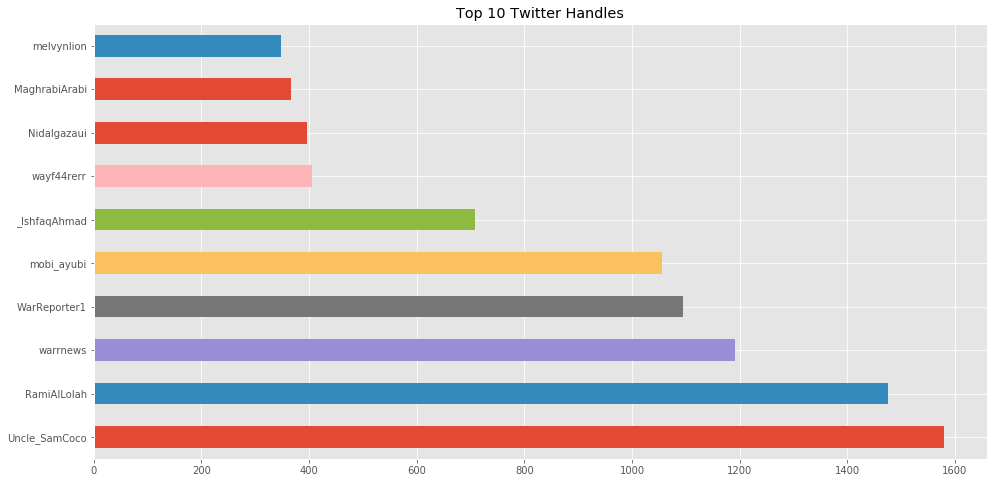

In [2]:
top_handles = data.username.value_counts().sort_values(ascending=False)
top_handles.head(10).plot.barh(title='Top 10 Twitter Handles', figsize=(16,8))

### Tweets over time

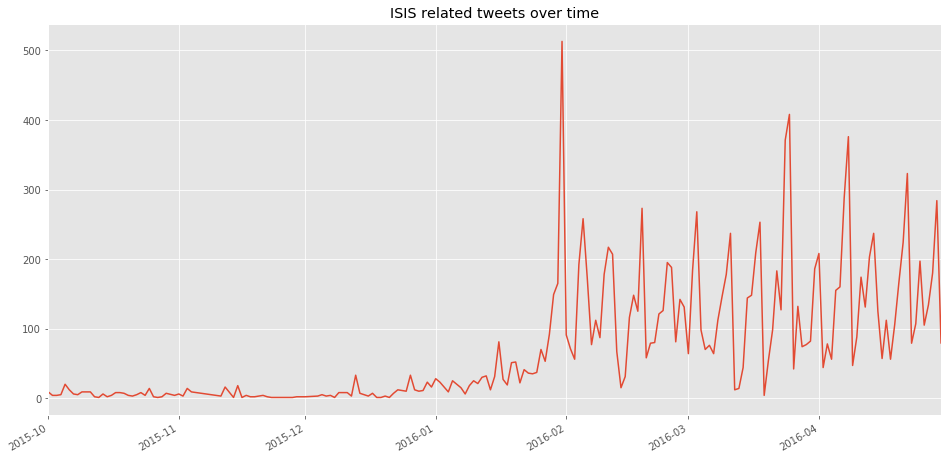

In [3]:
data.time.value_counts().plot(title='ISIS related tweets over time',
                              xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                              figsize=(16,8))

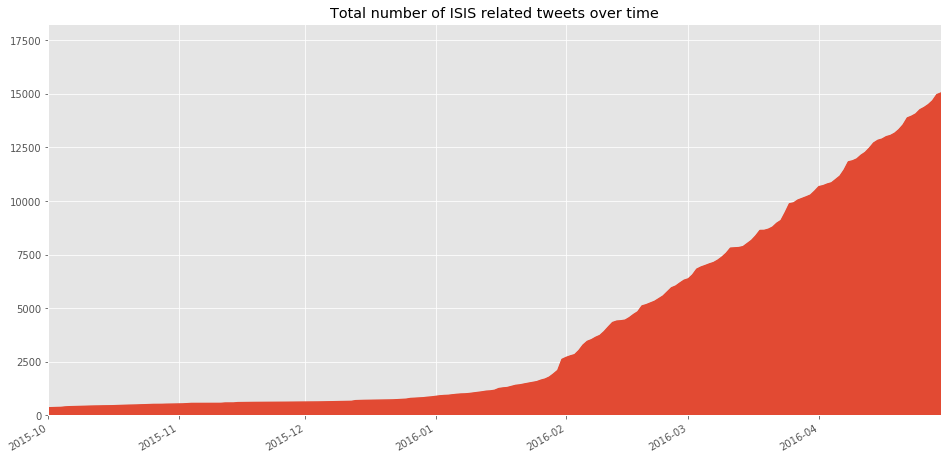

In [4]:
data.time.value_counts().sort_index().cumsum().plot.area(title='Total number of ISIS related tweets over time',
                                                         xlim=[datetime.date(2015, 10, 1),datetime.date(2016, 4, 30)],
                                                         figsize=(16,8))

### Tweets and Terrorism in April 2016

In [5]:
time_tweets = data.time.value_counts().sort_index()
april_tweets = time_tweets.loc['2016-4-1':'2016-4-30']

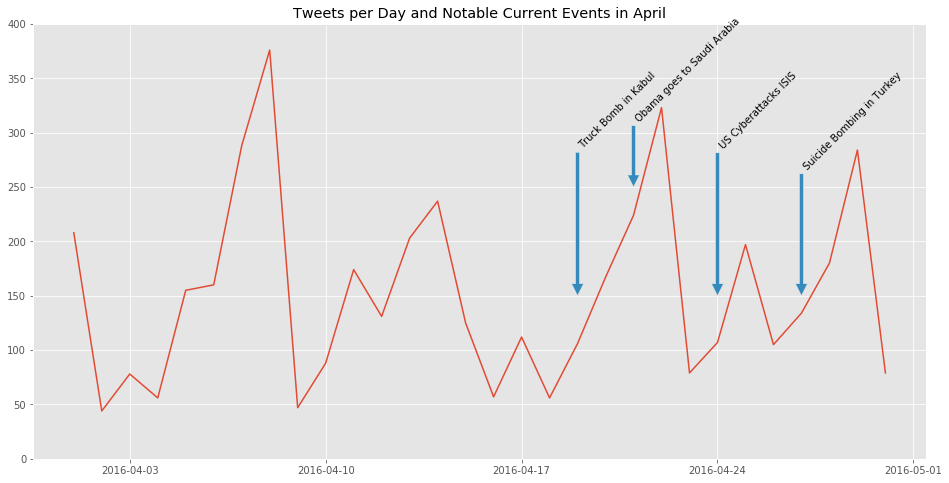

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
line = ax.plot(april_tweets)

apr19 = 'Truck Bomb in Kabul'
ax.annotate(apr19, xytext=('2016-4-19', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-19', 150))

apr21 = 'Obama goes to Saudi Arabia'
ax.annotate(apr21, xytext=('2016-4-21', 400), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-21',250))

apr24 = 'US Cyberattacks ISIS'
ax.annotate(apr24, xytext=('2016-4-24', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-24', 150))

apr27 = 'Suicide Bombing in Turkey'
ax.annotate(apr27, xytext=('2016-4-27', 350), rotation=45,
            arrowprops=dict(connectionstyle="arc3"), xy=('2016-4-27', 150))

ax.set_ylim(0,400)
plt.title('Tweets per Day and Notable Current Events in April')
plt.show()